[[-8.19518220e-01  2.25587145e-02  5.64893678e-03 -2.34889258e-03
   3.29796758e-04 -1.24706047e-04  1.35938309e-02  1.38559747e-01
   1.84447560e-03]]


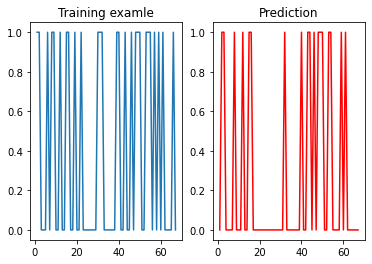

Accuracy : 80.59701492537313 %


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#If you using normal equation for linear regression, you do not need to scale features

def normalize_features(X):
    X_trans = X.T
    #Number of features
    n = X_trans.shape[0]
    for i in range(n):
        mean_value = np.mean(X_trans[i, :])
        std_value = np.std(X_trans[i, :])
        X_trans[i, :] = np.array([(x-mean_value) / std_value for x in X_trans[i, :]])
    return X_trans.T

def compute_cost_function(X, y, theta):
    #Number of training example
    m = X.shape[0]
    #Number of features+1 (include X0 column)
    n = X.shape[1]
    return 1/(2*m) * np.sum((X.dot(theta.T)-y)**2)


if __name__=='__main__':
    #Load data from directory
    data = pd.read_csv('C:/CNTT/DATA/PimaDataset/Pima.txt')
    #Features and outcome
    features = np.array(data.iloc[:, 0: 8]).reshape(-1, 8)
    outcome = np.array(data.iloc[:, 8]).reshape(-1, 1)
    
    #features = normalize_features(features)
    #Add one column as X0 features
    
    X0 = np.ones(features.shape[0]).reshape(-1, 1)
    features = np.column_stack((X0, features))
    
    #Split data for learning and testing
    #first 700 samples for learning
    X_train = features[0:700, :]
    X_test = features[700:, :]
    #Last 67 samples for testing
    y_train = outcome[0:700, :]
    y_test = outcome[700:, :]
    
    #theta = inv(X.T * X) * X.T * y
    
    theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train).reshape(1,-1)
    print(theta)
    
    predict_y = X_test.dot(theta.T)
    predict_y = np.array([(lambda x: 1 if x >=0.5 else 0)(x) for x in predict_y]).reshape(-1, 1)
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2)
    x = np.arange(1, 68)
    ax1.plot(x, y_test)
    ax2.plot(x, predict_y, color='red')
    ax1.set_title('Training examle')
    ax2.set_title('Prediction')
    plt.show()
    #Check accuracy with 67 last training example
    cnt = 67 - np.sum(np.abs(y_test - predict_y))
    print('Accuracy :',cnt/67*100,'%')